In [ ]:
!pip install geopandas
!pip install owslib

     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 15.4 MB 28.5 MB/s 
     |████████████████████████████████| 6.3 MB 37.3 MB/s 
     |████████████████████████████████| 216 kB 5.0 MB/s 


In [ ]:
# Bibliotecas
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

In [ ]:
# Endereço do WFS
url = "https://geoservicos.inde.gov.br/geoserver/INEA/wfs"

# Instanciando objeto
wfs = WebFeatureService(url=url)

# Armazenando camadas
camadas = list(wfs.contents)[-1]

# Parâmetros
parametros = dict(service='WFS', version="1.0.0", request='GetFeature',
      typeName=camadas, outputFormat='json')
# Realizando requisição
req = Request('GET', url, params=parametros).prepare().url

# Armazenando em geodataframe
data = gpd.read_file(req)

In [ ]:
# Visualizando tabela
data.head()

,id,ogc_fid,shp_gid,valor_irap,classe_ira,perimet_km,area_ha,shape_leng,shape_area,geometry
0,area_protegida_municipio_ea.1,1,330452,0.010367,"de 0 a 0,011740",91.505290,22948.634830,0.859266,0.020134,"MULTIPOLYGON Z (((-41.93386 -22.54193 0.00000,..."
1,area_protegida_municipio_ea.2,2,330455,0.034610,"de 0,011741 a 0,043002",377.456596,120128.122876,3.578117,0.105746,"MULTIPOLYGON Z (((-43.55937 -23.08059 0.00000,..."
2,area_protegida_municipio_ea.3,3,330460,0.000614,"de 0 a 0,011740",175.168132,81521.354338,1.646914,0.071281,"MULTIPOLYGON Z (((-41.88536 -21.87032 0.00000,..."
3,area_protegida_municipio_ea.4,4,330470,0.000348,"de 0 a 0,011740",158.867860,60165.732690,1.490642,0.052460,"MULTIPOLYGON Z (((-42.05756 -21.43378 0.00000,..."
4,area_protegida_municipio_ea.5,5,330475,0.000000,"de 0 a 0,011740",221.478445,110730.678633,2.060511,0.096460,"MULTIPOLYGON Z (((-41.01442 -21.60820 0.00000,..."


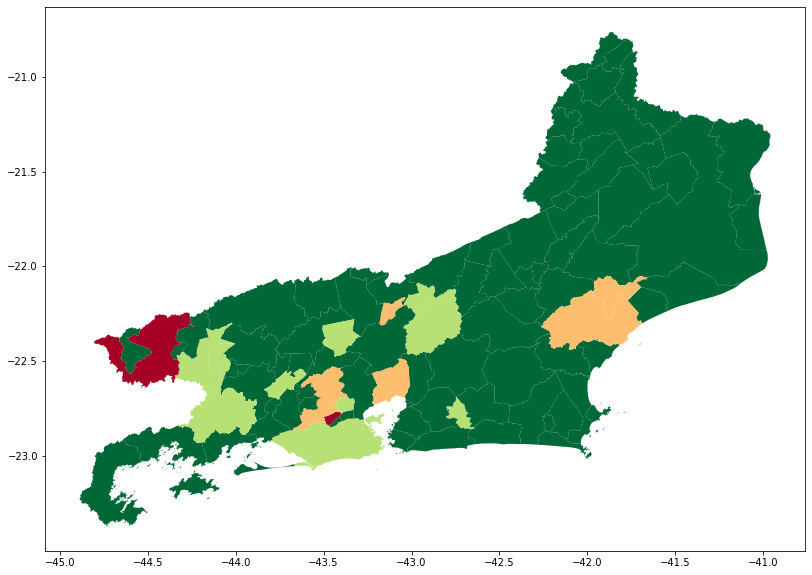

In [ ]:
#Visualizando mapa
data.plot(column='classe_ira', cmap='RdYlGn_r',figsize=(15,10))